# Practical 2: Training ANNs and CNNs

Contents:
* [1. Loading and Preparing the data](#1.-Loading-and-Preparing-the-data)
* [2. PyTorch Basics](#2.-PyTorch-Basics)
* [3. Designing a basic ANN](#3.-Designing-a-Basic-ANN)
* [4. Designing a basic CNN](#4.-Designing-a-Basic-CNN)
* [5. Extra Considerations](#5.-Extra-Considerations)

We will begin by considering the very basics needed for implementing a neural network. We will then explore training an ANN and CNN for the same pneumonia data we used in the last practical.

Throughout this practical, we will be using the ```PyTorch``` package to create and train our networks. The documentation has lots of information about the functions and their implementation. If you want more guidance on using ```PyTorch``` tutorials can be found [here](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html).

Look out for the following throughout the practical:

✅ To do: places where you need to add code throughout. Make sure that you understand what is going on before moving on to the next stage.

🏥 Indicates particular considerations when working with medical imaging data.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Import dependencies
# Here we load the packages that we need for the rest of the practical
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits import mplot3d
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
import torch
import time
from prepare_data import prepare_data

## 1. Loading and Preparing the data
#### 1.1 Loading the data
We will be using the same data as last week so we will just run a script to save some time. Check out last weeks practical to remind yourself of the steps.

In [ ]:
pth = '/content/drive/MyDrive/healthcare_practicals/data/pneumoniamnist.npz'  # Path to data
[X_train, y_train], [X_val, y_val], [X_test, y_test] = prepare_data(pth_to_data=pth)


## 2. PyTorch Basics
Although other packages exist, ```PyTorch``` is one of the most popular packages for designing and training neural networks. ```PyTorch``` is a lot like numpy. A lot of operations used to manipulate numpy arrays have their counterparts in PyTorch and numpy arrays can be converted to and from PyTorch *tensors*. PyTorch arrays are given the more proper mathematical name of tensors (see e.g. tensorflow). In terms of practical usage, PyTorch tensors can be manipulated very similarly to numpy’s ndarrays, with the addition being that tensors can also be used on a GPU to accelerate computing.

We first need to identify if we have a cuda device available. This practical will assume that we do not, but when you are training real models you will want to use the cuda device if it is available.

In [ ]:
device = torch.device("cuda: 0" if torch.cuda.is_available() else "cpu")
print(device)

Let's create a random array of numbers in both ```PyTorch``` and ```numpy```. They are indexed in the same way and can also be reshaped.

In [ ]:
# Numpy
numpy_random_arr = np.random.rand(2,2,2)
print('Numpy = ', numpy_random_arr)

# PyTorch
torch_random_arr = torch.rand(2,2,2)
print('Torch = ',torch_random_arr)

# Indexing
print(numpy_random_arr[0,0,0], torch_random_arr[0,0,0])

# Reshaping
numpy_random_arr = np.reshape(numpy_random_arr, [4,2])
torch_random_arr = torch_random_arr.reshape(4,2)
print(numpy_random_arr.shape)
print(torch_random_arr.size())

Converting between the two types of arrays is easy

In [ ]:
a = np.array([[1,2],[3,4]]) # make a numpy array

a_torch = torch.from_numpy(a) #converting to a torch Tensor from a numpy array
print(a_torch)

a_np = a_torch.numpy() # converting to a numpy array from a torch Tensor
print(a_np)

Other basic functions such as torch.diag, torch.cat (concatenate), torch.matmul work similarly to their numpy equivalents. <br>
As always, when looking for a function **check the [documentation](https://pytorch.org/docs/stable/nn.html)** and consider running through the [official PyTorch tutorial](https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html) on tensor manipulation.

Note that, as with numpy, the data type (dtype) of an object is important. PyTorch tensor types - just like in any other programming language - depend on whether they are storing integers, floating points or bools, and in how many bits. Often, it is important to make sure tensors are of the right / matching type when performing operations on them.
See https://pytorch.org/docs/stable/tensors.html for a list of dtypes and what they are called in PyTorch.

Changing torch tensor type is simple:


In [ ]:
print(a_torch)
print(a_torch.to(torch.double))

#### 2.2 Basic Tensor Operations
There is some streamlining of operations in PyTorch relative to numpy which can simplify code development. For example, compare here the multiplications of two arrrays using broadcasting.

**To do:**

✅ Generate two random numpy arrays, **a** and __b__ of sizes [12,5] and [3,5,20].


✅ Find the matrix product **a** $\cdot$ __b__ using broadcasting.
    **Hint: may need to reshape a first:**  multiplication of 3D arrays involves [multiplication of stacks of 2D matrices]( https://www.geeksforgeeks.org/numpy-3d-matrix-multiplication/). Therefore, the final result should be of shape (3,12,20), since multiplication of a ($12 \times 5$) and a ($5 \times 20$) matrix returns shape ($12 \times 20$).
    
✅ Convert **a** and __b__ into PyTorch Tensors and perform direct multiplication (without reshaping).

In [ ]:
a =
b =
c =
print(c)

a_t = torch.from_numpy(a)
b_t = torch.from_numpy(b)
c_t =
print(c)

#### 2.3 Autograd: automatic differentiation

As you might imagine, it is not the similarities between the two that we are interested in, but what makes torch tensors relevant to machine learning. The most significant and relevant difference is that PyTorch tensors also have an associated *gradient*. It is this that is used to perform the optimization that machine learning is based on.

The gradient of a PyTorch tensor is stored as its ```.grad``` attribute. All PyTorch tensors have this even if it is not apparent nor used. In such a case it would be set to "None".

All PyTorch tensors have another boolean attribute ```requires_grad``` that indicates whether PyTorch *needs* to track and store its gradient or whether it is simply a static tensor. By default, requires_grad is set to False.
When we later construct neural networks from the torch.nn neural network module, requires_grad will be automatically set to True for the relevant learning parameters so it is not something you should generally worry about setting manually.

In addition the attribute ```grad_fn```: This is the backward function used to calculate the gradient.

For example, let's observe gradient estimation for a simple function $L = \frac{1}{N} \sum_{i}\sum_j (2x_{ij}+3)^2  $ operating on a matrix $\mathbf{X}$ with $N$ elements.

**To do:**

✅ Run this code and check the outputs. Consider also printing out the `is_leaf` and `requires_grad` attributes for each tensor.

✅ Confirm the answer using the chain rule.

In [ ]:
X = torch.ones(5,5, requires_grad=True) # generate a random Tensor

print('Initial gradient:', X.grad) # check its gradient - the result is None

y=2*X+3
z=y*y
out = z.mean()

out.backward()
print('grad:', X.grad)
print('grad_fn:', out.grad_fn)

In practice the ```autograd``` package provides an engine to perform backpropagation. As variables and operations are defined, it sets up a dynamic computational graph in the same sense as we saw in our first lecture. In this, the leaves of the graph are input tensors, identified using the attribute ```is_leaf==True```. Roots are output tensors. Gradients are then calculated by tracing the graph from the root to the leaf and multiplying every gradient in the way using the chain rule.


#### 2.4. nn.Functional

As you will see as we go forward, most PyTorch layers can be implemented either as a `torch.nn.Module` object or as a `torch.nn.functional` function. So which should you use?

Essentially,  `nn.functional` provides building block functions (e.g. layers / activations) in the form of functions. This means that they can be directly called on the input rather than defining the object.

In cases where we have weights or other trainable parameters e.g. linear or convolutional layers, states which behave differently at train time and test time (for example dropout and Batch Norm), then we should use `nn.Module` objects.

On the other hand, in cases where no state or weights are required, `nn.functional` counterparts may be used. Examples being, resizing (nn.functional.interpolate),  average pooling (nn.functional.AvgPool2d) and activation functions.


# 3. Designing a Basic ANN

We are now going to train a basic ANN to classify the pneumonia data. This will require building up the different aspects of the training procedure.

In [ ]:
import torch.nn as nn # Contains all the functions we need to to train our network
import torch.nn.functional as F # Contains some additional functions such as activations
from torch.autograd import Variable

#### 3.1 Create a data loader

In the first task, as for the computer vision example we will create a dataloader to load the images and labels. In Deep Learning, the data must be collected and prepared into batches before being fed into the neural network for training. In many cases, our medical imaging data is too large to all be loaded into memory at once. We may also want to transform (augment) our data either as a pre-processing step or to simulate the creation of bigger data sets. Typically, we want to randomly shuffle our data during training such that our network does not always see data in the same order. PyTorch streamlines this process through the provision of two classes: *DataSet*, and accompanying iterator *DataLoader*.

Let's look at the basic structure of the `Dataset` class (https://github.com/pytorch/pytorch/blob/master/torch/utils/data/dataset.py) and discuss some of it's optional features.

```class Dataset(object):  

    """An abstract class representing a :class:Dataset.
    All datasets that represent a map from keys to data samples should subclass
    it. All subclasses should overwrite :meth:__getitem__, supporting fetching a
    data sample for a given key. Subclasses could also optionally overwrite
    :meth:__len__/, which is expected to return the size of the dataset by many
    :class:~torch.utils.data.Sampler implementations and the default options
    of :class:~torch.utils.data.DataLoader.
    .. note::
      :class:~torch.utils.data.DataLoader by default constructs a index
      sampler that yields integral indices.  To make it work with a map-style
      dataset with non-integral indices/keys, a custom sampler must be provided.
    """
    def __getitem__(self, index):
        raise NotImplementedError
    def __add__(self, other):
        return ConcatDataset([self, other])```




What this states is that any class that inherits from the baseclass must override the following methods:
- `__len__` so that len(dataset) returns the size of the dataset.
- `__getitem__` which returns a sample from the dataset given an index. For supervised learning from images this requires it to return both an example image and its label.

In addition to this it is common to pass a transform argument to the `DataSet` class which will support augmentation of the data. After that you have great freedom as to the actual structure and ordering of the code in the class.

The `DataLoader` is an iterator class, which uses the `__getitem__` and `__len__` functions to collate data into batches and sample at random (`shuffle`) from the data referenced by the `Dataset` class. It also supports loading and processing the data in parallel (with the number of parallel processes determined by parameter `num_workers`. **Generally, shuffling the order of the data is very important** as, in this way, the batches between epochs will not look alike, improving generalisation.

The generic form of a call to `DataLoader` is

`dataloader = DataLoader(transformed_dataset, batch_size=4,shuffle=True, num_workers=4)`
                        
Unlike the `Dataset` class, this is unlikely to need overloading.

We need to create a dataset to prepare our data for training. The data loader is going to take a pair of numpy arrays (X and y) and return the next batch of images and labels. For now we are going to keep our model as simple as possible and so we aren't going to add any augmentation transformations.

**To do:**

✅ Complete the dataset. This is as simple as a dataset gets, and they can be much more complicated. Hint: the numpy arrays need converting to PyTorch tensors.

✅ Think about how we could have incorporated the earlier data preprocessing into the dataloader.


In [ ]:
from torch.utils.data import Dataset, DataLoader

class numpy_dataset(Dataset):  # Inherit from Dataset class
    def __init__(self, data, target):
        ## Add code here
        self.data =
        self.target =

    def __getitem__(self, index):
        x =
        y =
        return x, y

    def __len__(self):
        return len(self.data)

train_dataset = numpy_dataset(X_train, y_train)
val_dataset = numpy_dataset(X_val, y_val)

train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True, drop_last=True)
val_dataloader = DataLoader(val_dataset, batch_size=16, shuffle=False, drop_last=True)

We can now iterate through the dataloader, to obtain each batch, using the ```iter```function.

**To do:**

✅ Visualise an example and check our data looks as expected. Remember, we have changed the intensity distribution with the ```centring``` function, which means that it won't look identical to at the beginning of the practical but it should still be recognisable! (This is very important if the dataset is more complicated.)

#### 3.2 Designing the network

It's now time to design our first network. We are first going to design a simple fully connected model using linear layers only.

A PyTorch network class is then defined from a minimum of two functions:

1. The first part is creation of the constructor `__init__` in which you must define all parameters and layers that you will use. **Note**, you must always call the super() function to initialize and start the parent class.
2. The second part is to define the forward pass through the function `forward(self,x)` which puts these layers together to calculate the output.

We need to design a simple fully connected architecture following the schematic below:

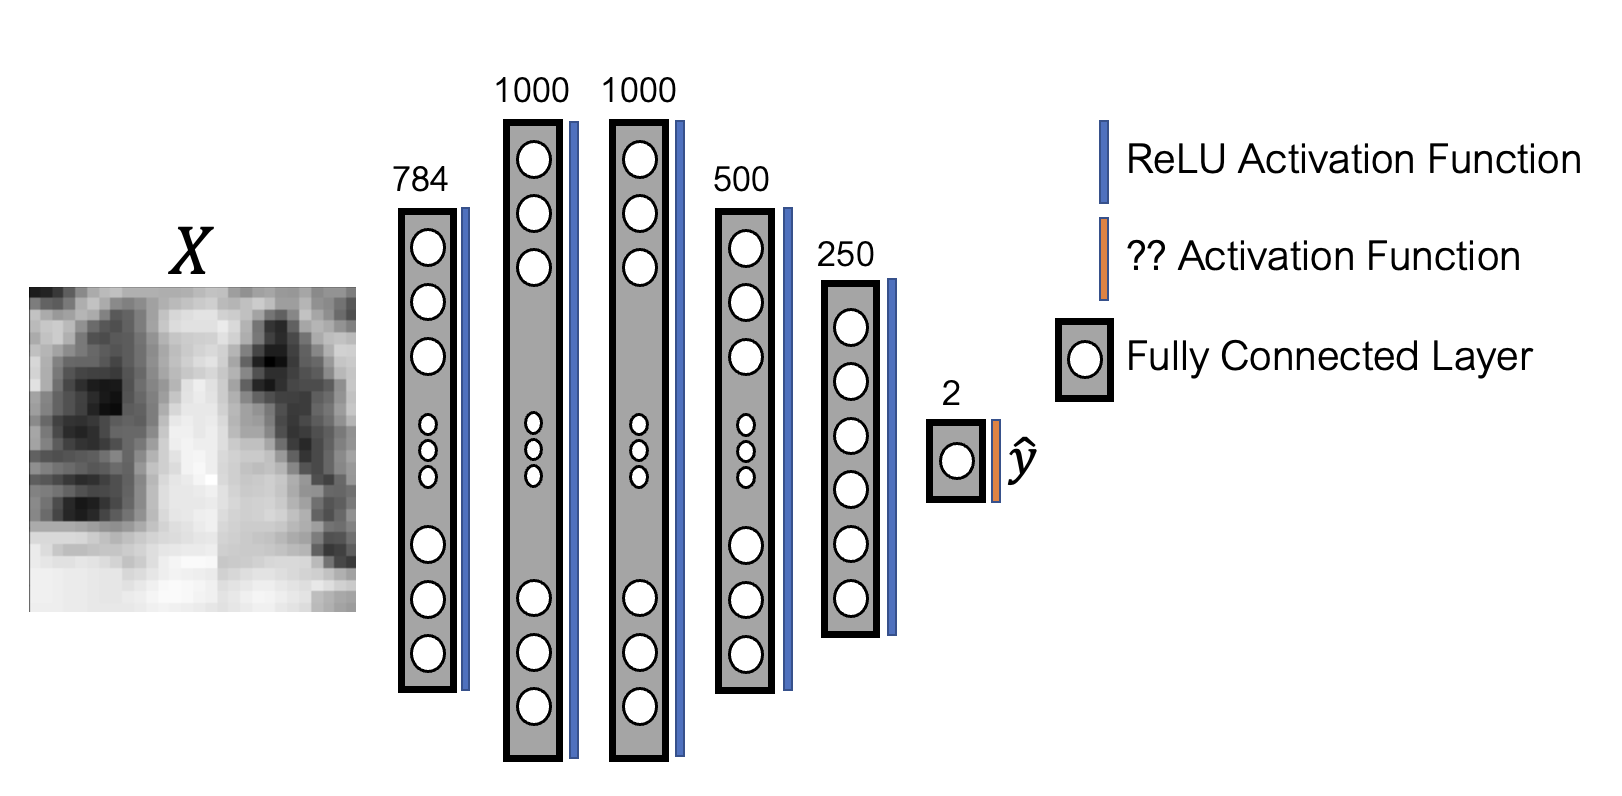

**To do:**

✅ Complete the model architecture.

✅ Identify how the image needs reshaping in the forward function to be passed through the model.

✅ Select the best activation function for the last layer. Hint: think about what the output of the last layer represents.

✅ Calculate the number of trainable parameters in the model.

✅ If we had a cuda device available we would load the model to the cuda device. Work out how we would do this.

🏥 We normally have much less data than is available in classic computer vision applications. What impact is this likely to have on our architecture choice?


In [ ]:
class ANN(nn.Module):
   def __init__(self):
        super(ANN, self).__init__()
        # Add architecture here
        self.layer1 =
        self.relu1 =
        self.layer2 =
        self.relu2 =
        self.layer3 =
        self.relu3 =
        self.layer4 =
        self.relu4 =
        self.layer5 =
        self.activation =

   def forward(self, x):
        # Define forward pass here
        # TODO: Reshape the image
        x =
        x = self.relu1(self.layer1(x))
        x = self.relu2(self.layer2(x))
        x = self.relu3(self.layer3(x))
        x = self.relu4(self.layer4(x))
        x = self.layer5(x)
        x = self.activation(x)
        return x

In [ ]:
net = ANN()
print(net)

print('Trainable params: ', params)

#### 3.3 Loss Function

Now we have defined and initialised our network, we must perform training to optimise the parameters (or weights of the network). For this we must choose a loss function and optimiser:

**Loss Function**

The loss function is used to measure how well the prediction model is able to predict the expected results. PyTorch already has many standard loss functions in the torch.nn module. For example, you can use the Cross-Entropy Loss to solve a multi-class classification problem, or a mean squared error (MSE) loss for regression.

**Optimiser**

There are many optmisers available in PyTorch - see https://pytorch.org/docs/stable/optim.html for full list and further examples. We explored some possible choices for these last week.

**To do:**

✅ Identify the best choice of loss function for a two class classification task and define it ready for training. If we were using a cuda device this would need loading to the cuda device.

✅ Define a stochastic gradient descent optimiser with momentum set to 0.9 and a learning rate of 0.001.

In [ ]:
class_loss =
optim =

#### 3.4 Training Procedure

**Forward Pass:**

When performing a forward pass you never explicitly call the `forward` function,  rather the inherited torch.nn.Module handles this behind the scenes. For more details see: https://discuss.pytorch.org/t/predict-output-by-model-does-not-need-call-forward/1489

Thus the entire forward pass reduces to two lines:

```python
# Make prediction with forward pass
prediction = net(inputs)

# Compute loss by calling the loss function
 loss = loss_func(prediction, outputs)

```

**Backpropagation and clearing gradients:**

To perform the backpropagation, you call the loss.backward(), followed by optim.step(). **You should clear gradients before every training iteration to ensure there are no gradients remaining**. This is to avoid mixing up gradients between minibatches.

```python
net.zero_grad() # to clear the existing gradient - this should be done prior to a training pass
optim.zero_grad() # to clear gradient in optimizer - this is equivalent to net.zero_grad().
loss.backward() # to perform backpropragation - accumulates the gradient (by addition) for each parameter
optim.step() # optimizer.step performs a parameter update based on the current gradient (stored in .grad attribute of a parameter) and the update rule.
```

We want to combine these into a training function. We also need to create a validation function where no training occurs. This allows us to evaluate the performance of the network through training.

**To do**

✅ Complete the training function. Note: the network is in train mode.

✅ Time how long an epoch of training takes.

✅ Complete the validation function. Note: the network is in eval mode. Eval mode affects the peformance of some functions but none of the ones included in this model.


In [ ]:
from sklearn.metrics import accuracy_score

def train(net, dataloader, optim, loss_func, epoch):
    net.train()  #Put the network in train mode
    total_loss = 0
    pred_store = []
    true_store = []

    batches = 0

    t0 = time.time()
    for batch_idx, (data, target) in enumerate(dataloader):

        data, target = Variable(data), Variable(target)
        batches += 1

        # Define training process here:



        total_loss += loss
        pred_store.append(np.argmax(pred.detach().numpy(), axis=1))
        true_store.append(np.argmax(target.detach().numpy(), axis=1))

        if batch_idx % 100 == 0: #Report stats every x batches
                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    epoch, (batch_idx+1) * len(data), len(dataloader.dataset),
                           100. * (batch_idx+1) / len(dataloader), loss.item()), flush=True)
    t1 = time.time()

    av_loss = total_loss / batches
    av_loss = av_loss.detach().cpu().numpy()

    pred_store = np.array(pred_store).reshape(-1)
    true_store = np.array(true_store).reshape(-1)
    acc = accuracy_score(pred_store, true_store)

    print('\nTraining set: Average loss: {:.4f}'.format(av_loss,  flush=True))
    print('Training set: Average Acc: {:.4f}'.format(acc,  flush=True))

    total_time = t1-t0
    print('Time for epoch = ', total_time)

    return av_loss, acc

def val(net, val_dataloader, optim, loss_func, epoch):
    net.eval()  #Put the model in eval mode
    total_loss = 0
    pred_store = []
    true_store = []

    batches = 0

    with torch.no_grad():  # So no gradients accumulate
        for batch_idx, (data, target) in enumerate(val_dataloader):
            batches += 1
            data, target = Variable(data), Variable(target)
            # Complete validation loop here:


            total_loss += loss
            pred_store.append(np.argmax(pred.detach().numpy(), axis=1))
            true_store.append(np.argmax(target.detach().numpy(), axis=1))
        av_loss = total_loss / batches

    av_loss = av_loss.detach().numpy()

    pred_store = np.array(pred_store).reshape(-1)
    true_store = np.array(true_store).reshape(-1)
    acc = accuracy_score(pred_store, true_store)

    print('Validation set: Average loss: {:.4f}'.format(av_loss,  flush=True))
    print('Validation set: Average Acc: {:.4f}'.format(acc,  flush=True))
    print('\n')

    return av_loss, acc

Now all we need to do is run these for several epochs and see how the model does!

In [ ]:
losses = []
max_epochs = 10
for epoch in range(1, max_epochs+1):
    train_loss, train_acc = train(net, train_dataloader, optim, class_loss, epoch)
    val_loss, val_acc = val(net, val_dataloader, optim, class_loss, epoch)
    losses.append([train_loss, train_acc, val_loss, val_acc])

In [ ]:
losses = np.array(losses).T
print(losses.shape)
epochs = np.linspace(1, max_epochs, max_epochs)

plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
plt.plot(epochs, losses[0,:])
plt.plot(epochs, losses[2,:])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.subplot(1,2,2)
plt.plot(epochs, losses[1,:])
plt.plot(epochs, losses[3,:])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])


#### 3.5 Evaluating performance on the held out data
That looks okay! We finally need to evaluate the performance of the model on the unseen test data. This allows us to compare between models with data that has never been seen by the model.

**To do:**

✅ Create a test dataset and dataloader.

✅ Complete the predict function.

✅ Evaluate the performance of the network on the test data.

🏥 Last week we looked at the FN rate to consider the network performance. Create a function to return the confusion matrix, so that we can evaluate the frequency of the types of errors being returned by the model, rather than just the accuracy.  (Don't use the inbuilt function!)

In [ ]:
test_dataset =
test_dataloader =

In [ ]:
def predict(net, test_dataloader):
    net.eval()  #Put the model in eval mode
    pred_store = []
    true_store = []



    return pred_store, true_store

def confusion_matrix(pred, true):
    assert pred.shape == true.shape

    return cm

In [ ]:
pred, true = predict(net, test_dataloader)
acc = accuracy_score(pred, true)
print('Test Accuracy = ', acc)
cm = confusion_matrix(pred, true)
print(cm)

#### 3.6 Selecting hyperparameters
The test accuracy is quite a lot lower than the maximum performance that was reached on the training set... This suggests that the model is overfitting to the training data. This model has lots of hyperparameters we can change to try to reduce this effect.

**To do:**

✅ Using the cell below, try to maximise the performance on the validation data.

✅ Does increasing the number of epochs improve the peformance? How would you identify overfitting and select a better model?

✅ Try changing the network design (but only as an ANN) and see what effect this has on the model performance.

✅ Once you select the **best** model on the validation data, predict on the test model. This is the final performance of the ANN model. It is important that the test data is held out until model selection is completed.


In [ ]:
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, drop_last=True)
val_dataloader = DataLoader(val_dataset, batch_size=16, shuffle=False, drop_last=True)

net = ANN()

class_loss = nn.BCELoss()
optim = torch.optim.SGD(net.parameters(), lr = 0.001, momentum=0.9)

losses = []
max_epochs = 20
for epoch in range(1, max_epochs+1):
    train_loss, train_acc = train(net, train_dataloader, optim, class_loss, epoch)
    val_loss, val_acc = val(net, val_dataloader, optim, class_loss, epoch)
    losses.append([train_loss, train_acc, val_loss, val_acc])

losses = np.array(losses).T
print(losses.shape)
its = np.linspace(1, max_epochs, max_epochs)

plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
plt.plot(its, losses[0,:])
plt.plot(its, losses[2,:])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.subplot(1,2,2)
plt.plot(its, losses[1,:])
plt.plot(its, losses[3,:])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

In [ ]:
# Only run this cell once when you have your final best performing model!

pred, true = predict(net, test_dataloader)
acc = accuracy_score(pred, true)
print('Test Accuracy = ', acc)
cm = confusion_matrix(pred, true)
print(cm)

**To do:**

✅ Add your final performance to the board so we can see what the best performance reached was.

## 4. Designing a Basic CNN
ANNs contain many many parameters due to the fully connected layers, which led to the introduction of CNNs with convolutional layers.
#### 4.1 Designing a CNN
The network we just trained was a simple fully connected neural network. We are now going to train a CNN in the same way. Consider the architecture below:

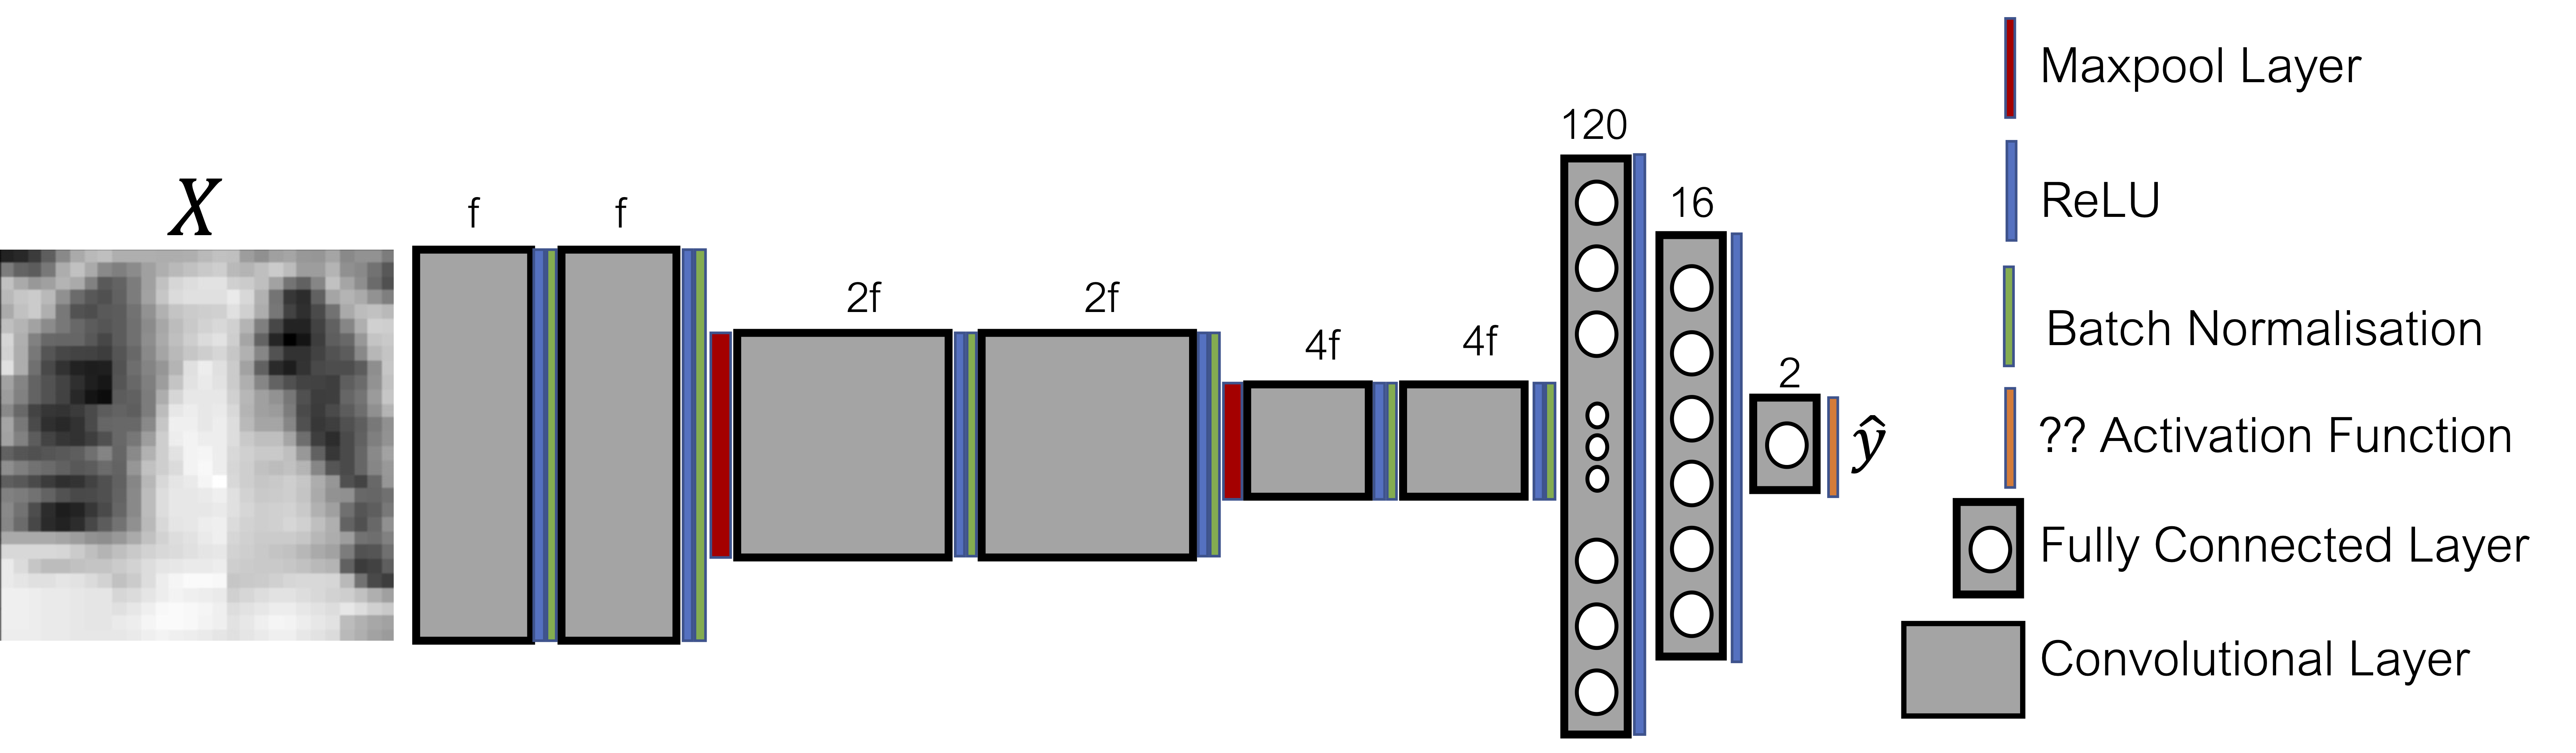

where f is the number of features and is a hyperparameter we can change. Note that as the resolution halves the number of feature representations doubles: this is a commonly used base framework.

CNN architectures are more complicated than the ANN we defined above so it often is best to use the ```Sequential``` method to define some parts of the network.

**To do**:

✅ Define the ```_block``` function for the convolutional layers. All convolutional layers should have kernels of size (3,3) and padding should be used to maintain image dimensions. Why is a kernel size of 3x3 the most common choice?

✅ Work out how to reshape the image to pass it into the fully connected layers.

In [ ]:
from collections import OrderedDict

class CNN(nn.Module):
    def __init__(self, init_features=4):
        super(CNN, self).__init__()
        # Convolutional layers
        features = init_features
        self.encoder1 = CNN._block(1, features, name="conv1")
        self.pool1 = nn.MaxPool2d(2, stride=3)
        self.encoder2 = CNN._block(features, 2*features, name="conv2")
        self.pool2 = nn.MaxPool2d(2, stride=3)
        self.encoder3 = CNN._block(2*features, 4*features, name="conv3")

        # Fully connected layers
        self.fc = nn.Sequential()
        self.fc.add_module('f_fc1', nn.Linear(, 120))
        self.fc.add_module('f_relu1', nn.ReLU(True))
        self.fc.add_module('f_fc2', nn.Linear(120, 16))
        self.fc.add_module('f_relu2', nn.ReLU(True))
        self.fc.add_module('f_fc3', nn.Linear(16, 2))
        self.fc.add_module('f_pred', nn.Softmax(dim=1))

    def forward(self, x):
        dec1 = self.encoder1(x)
        dec2 = self.encoder2(self.pool1(dec1))
        dec3 = self.encoder3(self.pool2(dec2))
        dec3 = dec3.view(-1, dec3.size()[1]*dec3.size()[2]*dec3.size()[3])
        pred = self.fc(dec3)
        return pred

    @staticmethod
    def _block(in_channels, features, name):
        return nn.Sequential(
            OrderedDict(
                [(
                    )
                ]))

**To do:**

✅ Calculate the number of parameters in the model. How does this compare to the ANN?


In [ ]:
net = CNN(init_features = 4)

print('Trainable params: ', params)

#### 4.2 Optimising the CNN

The model can now be trained using the same training functions we used to train the ANN (this is true as both networks are simple feedforward architectures which require the same inputs and return the same outputs).

**To do:**

✅ Try to maximise the performance of the CNN.

✅ Plot the performance as the number of features is changed. How does the peformance vary with the number of parameters? How does this compare to the ANN?

🏥 Remove the batch norm from the model and see how the performance is affected. Can you explain why batch norm is so useful in the model?

✅ Test the final model on the held out test set and add the performance to the board.

In [ ]:
train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True, drop_last=True)
val_dataloader = DataLoader(val_dataset, batch_size=16, shuffle=False, drop_last=True)

net = CNN(init_features = 32)

class_loss = nn.BCELoss()
optim = torch.optim.SGD(net.parameters(), lr = 0.001)

losses = []
max_epochs = 50
for epoch in range(1, max_epochs+1):
    train_loss, train_acc = train(net, train_dataloader, optim, class_loss, epoch)
    val_loss, val_acc = val(net, val_dataloader, optim, class_loss, epoch)
    losses.append([train_loss, train_acc, val_loss, val_acc])

losses = np.array(losses).T
print(losses.shape)
its = np.linspace(1, max_epochs, max_epochs)

plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
plt.plot(its, losses[0,:])
plt.plot(its, losses[2,:])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.subplot(1,2,2)
plt.plot(its, losses[1,:])
plt.plot(its, losses[3,:])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

In [ ]:
pred, true = predict(net, test_dataloader)
acc = accuracy_score(pred, true)
print('Test Accuracy = ', acc)
cm = confusion_matrix(pred, true)
print(cm)

# 5. Extra Considerations

🏥 Explain in your own words what the difference is between a ANN and a CNN. Why do we prefer CNNs over ANNs for image data as input?

🏥 What is the role of the activation functions? Why is ReLU a common choice?

🏥 What is the role of the pooing functions? Why is max pooling the most common choice in CNNs?

🏥 Why might we use a CNN layer with a filter of size 1x1 (for 2d images)?

🏥 What is meant by the receptive field of a CNN? When might we want to increase the receptive field of the network and how would we achieve this?

🏥 Medical images are often 3D and large, meaning that we can only set very small batchsizes. What impact do you think having a very small batchsize might have on a) training speed b) generalisation of the model?

🏥 How would a very small batchsize affect the use of batch norm in the model?

🏥 Can you think of an application where minimising the number of false positives would be critical?